In [1]:
%pylab inline
import os, csv

Populating the interactive namespace from numpy and matplotlib


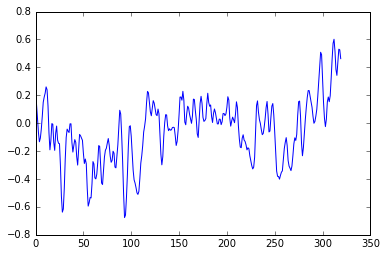

In [2]:
data_to_charge = 0 # 0 is for the music samples, 1 is for TIMIT
if data_to_charge not in (0, 1):
    raise ValueError("data_to_charge must be 0 (music) or 1 (speech)")
elif data_to_charge == 0:
    data_folder = "../sample/"
else:
    data_folder = "../timit"

files_names = (os.listdir(data_folder))
folder_size = len(files_names)
sample_lenght = 0

cr = csv.reader(open(data_folder + files_names[0], "r"))
for row in cr:
    sample_lenght += 1

data = np.zeros((folder_size, sample_lenght, 2))
    
for file_number, file in enumerate(files_names):
    cr = csv.reader(open(data_folder + file, "r"))
    for row_number, row in enumerate(cr):
        data[file_number][row_number] = [float(row[0]), float(row[1])]
        
plot(data[4][:,0])

In [3]:
class RNNNumpy:
    
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Randomly initialize the network parameters
        self.V = np.random.normal(0, 0.1, (word_dim, hidden_dim))
        self.W = np.random.normal(0, 0.1, (hidden_dim, hidden_dim))

In [64]:
def forward_propagation(self, size, initialState):
    # The total number of time steps
    T = size
    # During forward propagation we save all hidden states in s because need them later.
    s = np.zeros((T , self.hidden_dim))
    s[-1] = np.array([initialState] * self.hidden_dim)
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))
    # For each time step...
    for t in np.arange(T):
        s[t] = np.tanh(self.W.dot(s[t-1]))
        o[t] = self.V.dot(s[t])
    return [o, s]

RNNNumpy.forward_propagation = forward_propagation

In [65]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(len(x), x[1])
    return o

RNNNumpy.predict = predict

In [66]:
def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

[[ -9.46015884e-03]
 [ -2.85140563e-01]
 [ -3.97118189e-04]
 [  1.79500463e-01]
 [  1.25809023e-02]
 [  1.50121314e-01]
 [  9.78215495e-02]
 [ -2.46907734e-02]
 [  1.55562333e-03]
 [  6.70933821e-02]
 [ -1.59138908e-02]
 [  2.49815286e-01]
 [ -3.28918706e-02]
 [  1.26299591e-02]
 [  3.28001647e-02]
 [ -1.73241479e-01]
 [  1.67161032e-01]
 [  2.74374304e-02]
 [ -2.65974268e-02]
 [  2.45776565e-01]
 [ -1.03894770e-01]
 [  5.74403883e-03]
 [  7.33612096e-02]
 [ -1.80143647e-01]
 [  1.98584872e-01]
 [  6.56195405e-02]
 [ -5.67769794e-02]
 [  2.32502748e-01]
 [ -2.82277194e-01]
 [  4.09949501e-02]
 [  9.51101700e-02]
 [ -1.23268770e-01]
 [  2.37787049e-01]
 [  1.11786445e-02]
 [ -1.49055517e-01]
 [  1.99848887e-01]
 [ -2.68680247e-01]
 [  9.96254040e-02]
 [  1.10392144e-01]
 [ -1.40429983e-01]
 [  2.28047209e-01]
 [ -5.02201802e-02]
 [ -1.69459668e-01]
 [  1.96019405e-01]
 [ -2.27212443e-01]
 [  1.23959416e-01]
 [  1.16979590e-01]
 [ -1.83771178e-01]
 [  1.55602774e-01]
 [ -5.45844431e-02]


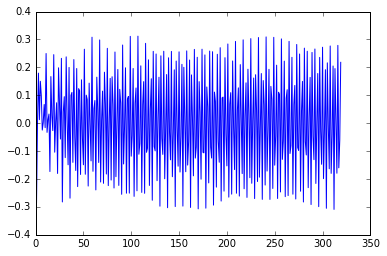

In [67]:
model = RNNNumpy(1)
X_train = data[4][:,0]
o = model.predict(X_train)
print(o)
print(o.shape)
plot(o)

In [68]:
def calculate_loss(self, x):
    o, s = self.forward_propagation(len(x), x[1])
    o=o.reshape(x.shape)
    return ((x-o)*(x-o)).sum()
model.calculate_loss=calculate_loss

In [69]:
loss = model.calculate_loss(model, X_train)
loss

28.851044448368157

In [70]:
def bptt(self, x):
    T = len(x)
    # Perform forward propagation
    o, s = self.forward_propagation(len(x), x[1])
    # We accumulate the gradients in these variables
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    #delta_o[np.arange(len(x)), x] -= 1.
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdV, dLdW]

RNNNumpy.bptt = bptt

In [71]:
# Performs one step of SGD.
def numpy_sdg_step(self, x, learning_rate):
    # Calculate the gradients
    dLdV, dLdW = self.bptt(x)
    # Change parameters according to gradients and learning rate
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW

RNNNumpy.sgd_step = numpy_sdg_step

In [72]:
# Outer SGD Loop
# - model: The RNN model instance
# - x: séquence to generate
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
def train_with_sgd(model, x, learning_rate=0.0003, nepoch=100):
    # We keep track of the losses so we can plot them later
    losses = []
    for epoch in range(nepoch):
        # One SGD step
        loss = model.calculate_loss(model,x)
        losses.append(loss)
        model.sgd_step(x, learning_rate)
        
    return losses
 

In [73]:
losses = train_with_sgd(model, X_train, nepoch=100)

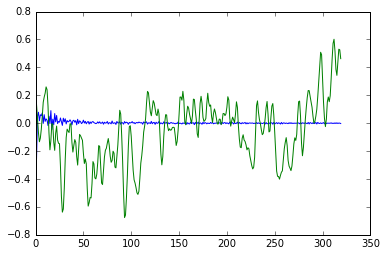

In [74]:
o = model.predict(X_train)
plot(o)
plot(X_train)

[28.851044448368157,
 18.629826203130747,
 18.480104375659625,
 18.417156191341636,
 18.383651594467622,
 18.36297265158862,
 18.347714536360897,
 18.335354227180758,
 18.325029993865414,
 18.31634385230662,
 18.30901129888208,
 18.302784556077512,
 18.297445537775459,
 18.292808888915705,
 18.288722237602443,
 18.285063254794647,
 18.281735202652175,
 18.278662265969277,
 18.2757853257337,
 18.273058406930136,
 18.270445811870804,
 18.267919858036276,
 18.265459113747578,
 18.263047029176963,
 18.260670875217571,
 18.258320919741433,
 18.25598978619923,
 18.253671952266419,
 18.251363356297194,
 18.249061087084257,
 18.246763138290067,
 18.244468213342618,
 18.242175569917624,
 18.239884895639165,
 18.237596208525879,
 18.235309777148114,
 18.233026056556906,
 18.23074563688667,
 18.228469202180232,
 18.226197497486172,
 18.223931302670515,
 18.22167141169011,
 18.219418616317217,
 18.217173693495567,
 18.214937395661522,
 18.212710443484742,
 18.210493520581856,
 18.208287269835907,


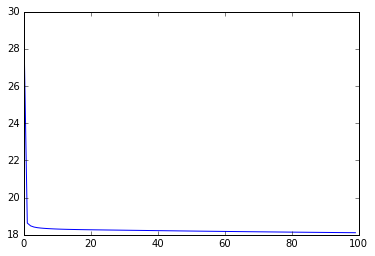

In [75]:
plot(losses)
losses

17.704175793299104